<a href="https://colab.research.google.com/github/wisrovi/RedesNeuronales/blob/master/07MAIR-WilliamSteveRodriguezVillamizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tensorflow==2.0.0-alpha0

In [0]:
#urlArchivos = "https://drive.google.com/drive/folders/1w2w5dAF269C646RBwwU33YLNUG4JRfh9?usp=sharing"

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
###################################################################################################
BASE_FOLDER = '/content/drive/My Drive/Master IA/Redes Neuronales/'
BASE_FOLDER = '/content/gdrive/My Drive/Master IA/Redes Neuronales/'
###################################################################################################

In [0]:
#le indicamos al colaboratory que las importaciones de librerias propias se haran tambien desde el directorio base
import sys
sys.path.append(BASE_FOLDER)

In [6]:
from ModeloExterno import ModeloExterno
modelExtern = ModeloExterno(nombreModelo="wisrovi", rutaBase=BASE_FOLDER)

Using TensorFlow backend.


In [0]:
#!ls "/content/gdrive/My Drive/Master IA/Redes Neuronales/"

In [0]:
#importo las librerias que se van a necesitar
import pickle
import matplotlib.pyplot as plt
import numpy as np

from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical #para que las salidas queden parametrizadas en binario

from sklearn.metrics import classification_report #para ver parametros 

from keras.applications.inception_v3 import decode_predictions #para ver varios items de prediccion

In [0]:
#para autoescalar la imagen al tamaño requerido por la red a reentrenar
from keras.applications.inception_v3 import preprocess_input

In [10]:
#Cargo los archivos de clases y las imagenes
with open(BASE_FOLDER+"pickle_all_images_df-002.pickle", "rb") as input_file:
    x_train_all = pickle.load(input_file)
with open(BASE_FOLDER+"pickle_all_classes.pickle", "rb") as input_file:
    y_train_all = pickle.load(input_file)

number_of_classes = len(y_train_all)

print("Entradas: ",x_train_all.shape)
print("Salidas: ", number_of_classes)

Entradas:  (9145, 128, 128, 3)
Salidas:  9145


In [0]:
#Algunas funciones utiles
def plot_image(img, title=""):
    #plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(title)
    #plt.axis('off')
    plt.show()

def convertLabelsToNumbers(y_train):
    # Transformando las labels de texto a valores numéricos
    y = np.unique(y_train)
    mapping = { key : value for key,value in zip(y,range(len(y)))}
    processed_y = np.array([mapping[i] for i in y_train])
    print(len(mapping))
    return processed_y

def DividirDatos_Train_Test_Predic(x, y, porcentaje=0.33, randomDiv=52):
    # dividir los datos entre training, test y predic
    X_train, X_test, y_train, y_test = train_test_split(
        x_train_all, processed_y, 
        test_size=porcentaje, 
        random_state=randomDiv)

    X_test, X_predic, y_test, y_predic = train_test_split(
        X_test, y_test, 
        test_size=porcentaje, 
        random_state=randomDiv)
    
    #Hacemos el One-hot Encoding
    train_Y_one_hot = to_categorical(y_train)
    test_Y_one_hot = to_categorical(y_test)
    predic_Y_one_hot = to_categorical(y_predic)

    return (X_train, train_Y_one_hot), (X_test, test_Y_one_hot), (X_predic, predic_Y_one_hot)

def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['acc'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_pred(pred):
    plt.figure(figsize=(8, 2))
    classes = [c[1] for c in pred]
    probas = [c[2] for c in pred]
    y_pos = np.arange(len(classes))
    plt.barh(y_pos, probas, align='center')
    plt.yticks(y_pos, classes)
    plt.gca().invert_yaxis()
    plt.xlabel('Probability')
    plt.xlim(0, 1)

In [12]:
imagen = 250

# show image
#plot_image(x_train_all[imagen])

processed_y = convertLabelsToNumbers(y_train_all)
print(processed_y[imagen], y_train_all[imagen])

102
6 airplanes


In [13]:
classes = np.unique(processed_y)
nClasses = len(classes)
print("Numero de clases diferenes:", nClasses)
print()

(X_train, y_train), (X_test, y_test), (X_predic, y_predic) = DividirDatos_Train_Test_Predic(x_train_all, processed_y)

print("Training (66.98%)") 
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print() 
print("Test (22.1%)") 
print("X_test", X_test.shape)
print("y_test", y_test.shape)
print()
print("Predict (10.89%)") 
print("X_predic", X_predic.shape)
print("y_predic", y_predic.shape)

Numero de clases diferenes: 102

Training (66.98%)
X_train (6127, 128, 128, 3)
y_train (6127, 102)

Test (22.1%)
X_test (2022, 128, 128, 3)
y_test (2022, 102)

Predict (10.89%)
X_predic (996, 128, 128, 3)
y_predic (996, 102)


In [0]:
#Creamos el Set de Entrenamiento y Validación
#divido los datos de entrenamiento en dos, un 80% para el entrenamiento y otro 20% para validacion
train_X,valid_X,train_label,valid_label = train_test_split(
    X_train, y_train, 
    test_size=0.1, random_state=43)

In [37]:
print("********** Modelo *********")

from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

new_model = Sequential()
new_model.add(
    Conv2D(32,
           kernel_size=(3, 3),
           activation='relu',
           padding='same',
           input_shape=(128,128,3)
           )
    )
new_model.add(Dense(128, activation='relu'))
new_model.add(MaxPooling2D((2, 2),padding='same'))
new_model.add(Dropout(0.5))

new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.25)) 
new_model.add(Dense(64, activation='relu'))
new_model.add(Flatten())
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.5)) 
new_model.add(Dense(nClasses, activation='softmax'))

new_model.summary()

new_model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

#Entreno el modelo
history = new_model.fit(
    train_X, train_label, 
    batch_size=64, # cantidad de imágenes que se toman a la vez en memoria
    epochs=100,
    verbose=1,
    validation_data=(valid_X, valid_label)
    )

********** Modelo *********
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
dense_29 (Dense)             (None, 128, 128, 128)     4224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 64, 64, 128)       0         
_________________________________________________________________
dense_30 (Dense)             (None, 64, 64, 64)        8256      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
dense_31 (Dense)          

In [38]:
#valido el modelo
test_eval = new_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

2022/2022 [==============================] - 1s 556us/step
Test loss: 5.847094311086879
Test accuracy: 0.3911968348464909


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


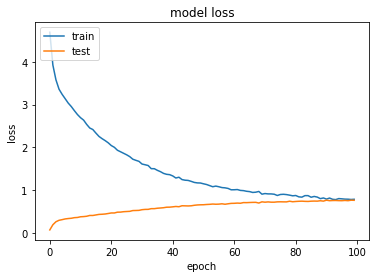

In [39]:
plot_history(history)

In [40]:
modelExtern.GuardarModelo(new_model)

True

In [41]:
modeloCArgado = modelExtern.CargarModeloGuardado(True)

No se pudo cargar el modelo.


In [19]:
dato = preprocess_input(X_predic[50])
dato = np.expand_dims(dato, axis=0) #añadir una dimension mas para que el modelo lo pueda evaluar
#print(dato.shape)

prediccion = new_model.predict(dato) #predecir
#print(prediccion[0])

ynew = new_model.predict_classes(X_predic)
#print(ynew)
for i in range(len(X_predic)):
	  #print("X=%s" % (X_predic[i]))
	  print("Predicted=%s" % (y_predic[i]))
    #print(y_train_all[y_predic[i]])

#print(decode_predictions(prediccion, top=5))
#plot_pred()

Predicted=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Predicted=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Predicted=[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Predicted=[0. 0. 0. 0. 0. 0. 0. 0.

In [0]:
# VGG16, VGG19, ResNet50, 
#Xception, InceptionV3, InceptionResNetV2, 
#MobileNetV2, DenseNet, RasNet


#https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

from keras.applications import VGG16 
conv_base = VGG16(weights='imagenet',
                 include_top=False, # Si se deben incluir o no las capas de salida para el modelo
                 input_shape=(128,128,3))

congelarTodoModeloImagenet = False
if congelarTodoModeloImagenet:
  conv_base.trainable = False
else:
  # Freeze the layers except the last 4 layers
  cantidadCapasFinalesDescongelar = 4
  for layer in conv_base.layers[:-cantidadCapasFinalesDescongelar]:
      layer.trainable = False
      pass

  # Check the trainable status of the individual layers
  for layer in conv_base.layers:
      pass
      print(layer, layer.trainable)



#conv_base.summary()

In [0]:
from keras.applications.inception_v3 import InceptionV3

conv_base = InceptionV3(
      weights='imagenet', 
      include_top=True)




In [0]:
pre_trained_model = models.Sequential()
pre_trained_model.add(conv_base)

# conectarlo a nueva parte densa
pre_trained_model.add(layers.Dense(number_of_classes, activation='relu'))
pre_trained_model.add(layers.Dense(1, activation='relu'))

pre_trained_model.summary()

# compilar el modelo
pre_trained_model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

#entrenar el modelo
history = pre_trained_model.fit(X_train, y_train, epochs=25)

In [0]:
loss,accuracy = pre_trained_model.evaluate(X_test_eval,y_test_eval)

print('loss {} accuracy {}'.format(loss,accuracy))

In [0]:


plot_image(x_train_all[250], y_train_all[250])

In [0]:

print("conjunto datos predecir: ", len(X_test_predic))
cantidadPorcentajesMostrar = 5 #muestra los de mayor porcentaje

In [0]:
from skimage.transform import resize

def predecir(model, dato):
  dato = resize(dato, (299, 299), anti_aliasing=True)

  dato = preprocess_input(dato)
  dato = np.expand_dims(dato, axis=0) #añadir una dimension mas para que el modelo lo pueda evaluar

  prediccion = model.predict(dato) #predecir
  return decode_predictions(prediccion, top=cantidadPorcentajesMostrar)[0]

In [0]:
dato_evaluar = X_predic[100]
pred = predecir(conv_base, dato_evaluar)
plot_image(dato_evaluar, "Pred")
plot_pred(pred)

In [0]:
print(X_test_predic[0].shape)
print(type(X_test_predic[0]))

In [0]:
nombreModeloGuardado = "model.json"
nombrePesosGuardados = "model.h5"

def GuardarModelo(model, archivoModelo, archivoPesos):
    try:
        # serializar el modelo a JSON
        model_json = model.to_json()
        with open(archivoModelo, "w") as json_file:
            json_file.write(model_json)
            print("Modelo guardado!")
        # serializar los pesos a HDF5
        model.save_weights(archivoPesos)
        print("Pesos Guardados!")
        return True
    except:
        return False

GuardarModelo(conv_base, BASE_FOLDER + "model.json",  BASE_FOLDER + "model.h5")

In [0]:
from keras.models import model_from_json

def CargarModeloGuardado(archivoModelo, archivoPesos):
    # cargar json y crear el modelo
    json_file = open(archivoModelo, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    print("Modelo Cargado!")

    # cargar pesos al nuevo modelo
    loaded_model.load_weights(archivoPesos)
    print("Pesos Cargados!")
    
    # Compilar modelo cargado y listo para usar.
    loaded_model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
    print("Modelo compilado!")
    return loaded_model

modeloCargado = CargarModeloGuardado(BASE_FOLDER + "model.json",  BASE_FOLDER + "model.h5")
#modeloCargado.summary()

In [0]:
dato_evaluar = X_predic[150]
pred = predecir(modeloCargado, dato_evaluar)
plot_image(dato_evaluar, "Pred")
plot_pred(pred)

In [0]:
dato_evaluar = X_predic[350]
pred = predecir(modeloCargado, dato_evaluar)

from sklearn.metrics import classification_report 
scnn_report = classification_report(np.argmax(y_predic, axis=1), pred)  
print(scnn_report) 

In [0]:
url = 'https://www.aprendemachinelearning.com/clasificacion-de-imagenes-en-python/'